In [14]:
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math
import sys
import os
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Proyecto7---Proyecto-Regresi-n-Lineal\\Datos\\datos_1\\datos_limpios.csv', index_col=0)
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,distance,status,floor,hasLift
0,750.0,flat,60.0,True,1,1,7037,good,3,True
1,750.0,flat,70.0,True,2,1,16145,good,bj,False
2,400.0,penthouse,67.0,True,2,2,55041,good,2,False
3,590.0,flat,70.0,True,3,2,56596,good,Desconocido,False
4,684.0,studio,45.0,True,0,1,10656,Desconocido,Desconocido,Desconocido


In [16]:
df.describe()

,price,size,rooms,bathrooms,distance
count,353.000000,353.000000,353.000000,353.000000,353.000000
mean,692.932011,59.728045,1.543909,1.110482,16698.824363
std,61.307820,23.799745,0.934760,0.322857,13549.504221
min,400.000000,20.000000,0.000000,1.000000,183.000000
25%,650.000000,45.000000,1.000000,1.000000,5656.000000
50%,700.000000,57.000000,2.000000,1.000000,12321.000000
75%,740.000000,70.000000,2.000000,1.000000,26558.000000
max,750.000000,206.000000,4.000000,3.000000,56596.000000


Estas dos son variables categóricas en todo momento, pero debo retomarlas porque me las vuelve a colocar en numéricas.

In [17]:
df['bathrooms'] = df['bathrooms'].astype('O')
df['rooms'] = df['rooms'].astype('O')

In [18]:
df.describe()

,price,size,distance
count,353.000000,353.000000,353.000000
mean,692.932011,59.728045,16698.824363
std,61.307820,23.799745,13549.504221
min,400.000000,20.000000,183.000000
25%,650.000000,45.000000,5656.000000
50%,700.000000,57.000000,12321.000000
75%,740.000000,70.000000,26558.000000
max,750.000000,206.000000,56596.000000


In [19]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[["size", 'distance']])
df[["size_robust", 'distance_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df[["size", 'distance']])
df[["size_minmax", 'distance_minmax']] = datos_transf_min_max

escalador_norm = Normalizer()
datos_transf_norm = escalador_norm.fit_transform(df[["size", 'distance']])
df[["size_norm", 'distance_norm']] = datos_transf_norm

escalador_stand = StandardScaler()
datos_transf_stand = escalador_stand.fit_transform(df[["size", 'distance']])
df[["size_stand", 'distance_stand']] = datos_transf_stand

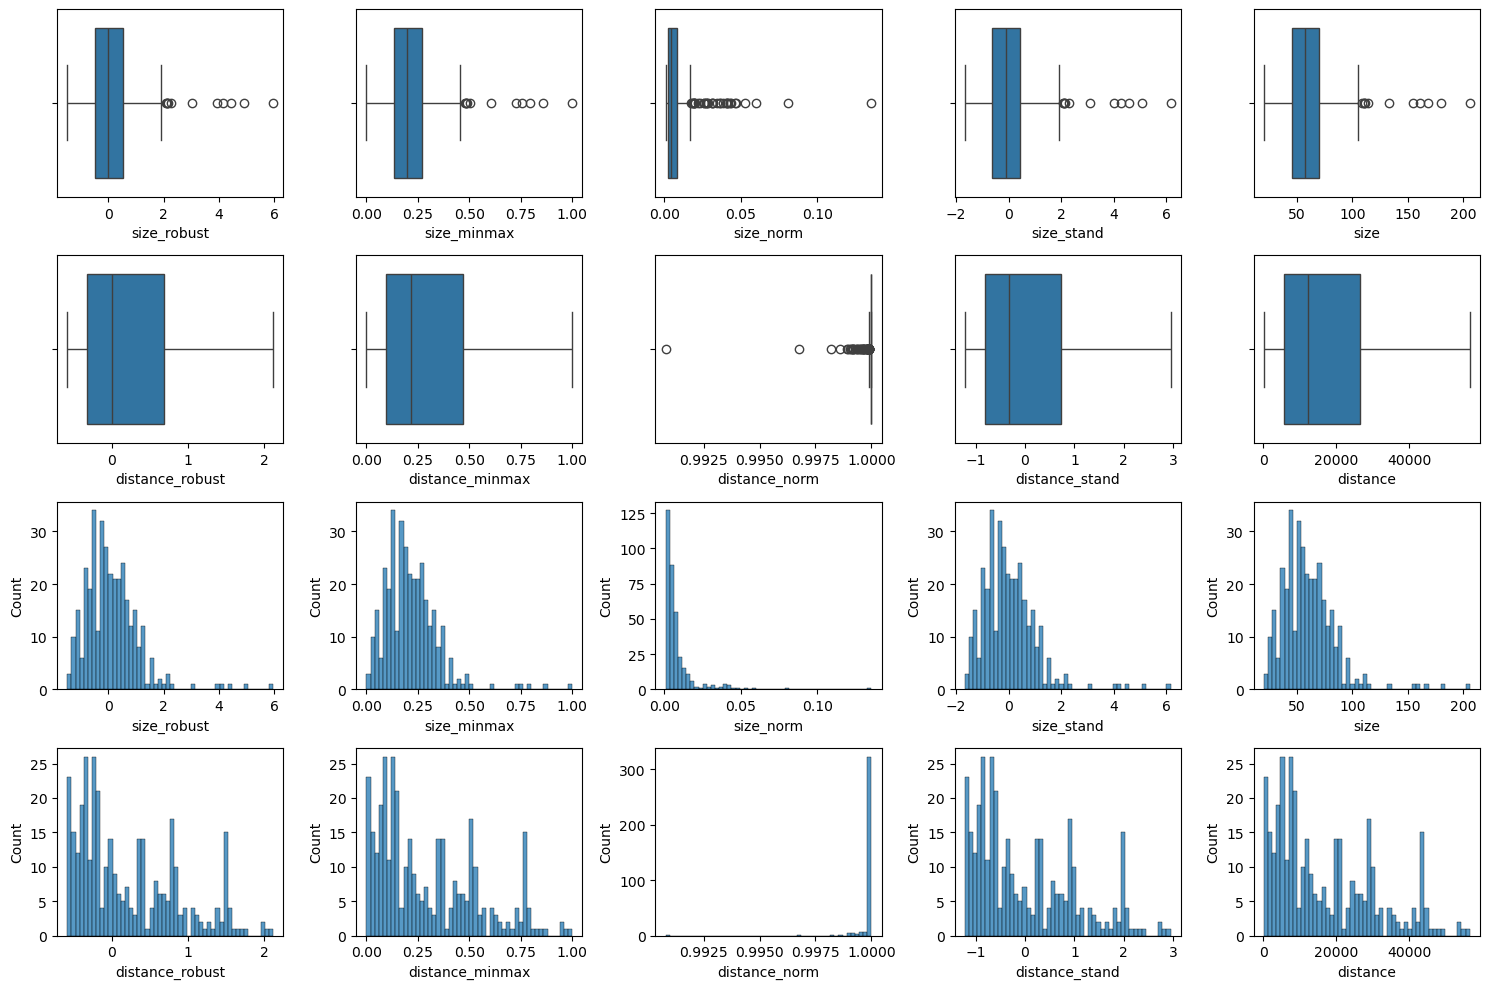

In [20]:
fig , axes = plt.subplots(nrows=4 , ncols=5, figsize = (15, 10))
sns.boxplot(x = "size_robust", data = df, ax = axes[0][0])
sns.boxplot(x = "size_minmax", data = df, ax = axes[0][1])
sns.boxplot(x = "size_norm", data = df, ax = axes[0][2])
sns.boxplot(x = "size_stand", data = df, ax = axes[0][3])
sns.boxplot(x = "size", data = df, ax = axes[0][4])

sns.boxplot(x = "distance_robust", data = df, ax = axes[1][0])
sns.boxplot(x = "distance_minmax", data = df, ax = axes[1][1])
sns.boxplot(x = "distance_norm", data = df, ax = axes[1][2])
sns.boxplot(x = "distance_stand", data = df, ax = axes[1][3])
sns.boxplot(x = "distance", data = df, ax = axes[1][4])

sns.histplot(x = "size_robust", data = df, ax = axes[2][0], bins = 50)
sns.histplot(x = "size_minmax", data = df, ax = axes[2][1], bins = 50)
sns.histplot(x = "size_norm", data = df, ax = axes[2][2], bins = 50)
sns.histplot(x = "size_stand", data = df, ax = axes[2][3], bins = 50)
sns.histplot(x = "size", data = df, ax = axes[2][4], bins = 50)


sns.histplot(x = "distance_robust", data = df, ax = axes[3][0], bins = 50)
sns.histplot(x = "distance_minmax", data = df, ax = axes[3][1], bins = 50)
sns.histplot(x = "distance_norm", data = df, ax = axes[3][2], bins = 50)
sns.histplot(x = "distance_stand", data = df, ax = axes[3][3], bins = 50)
sns.histplot(x = "distance", data = df, ax = axes[3][4], bins = 50)

plt.tight_layout()

Decidí quedarme con las columnas del método stand ya que este método lo utilizo porque tengo outliers y no son de mucha importancia.

## Observaciones

- Existen outliers en mi variable size, estos aparecen por encima de los 100 m2. Estos son pocos, pero debemos considerar qué tipo de pisos son 

In [21]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'distance', 'status', 'floor', 'hasLift', 'size_robust',
       'distance_robust', 'size_minmax', 'distance_minmax', 'size_norm',
       'distance_norm', 'size_stand', 'distance_stand'],
      dtype='object')

In [22]:
columnas_seleccionadas= ['price', 'propertyType', 'size_stand', 'exterior', 'rooms', 'bathrooms',
       'distance_stand', 'status', 'floor', 'hasLift']

In [23]:
df_filtrado = df[columnas_seleccionadas]

In [24]:
df_filtrado.head()

,price,propertyType,size_stand,exterior,rooms,bathrooms,distance_stand,status,floor,hasLift
0,750.0,flat,0.011443,True,1,1,-0.714088,good,3,True
1,750.0,flat,0.432212,True,2,1,-0.040932,good,bj,False
2,400.0,penthouse,0.305981,True,2,2,2.833801,good,2,False
3,590.0,flat,0.432212,True,3,2,2.948728,good,Desconocido,False
4,684.0,studio,-0.619710,True,0,1,-0.446614,Desconocido,Desconocido,Desconocido


In [25]:
df_filtrado.shape

(353, 10)

In [ ]:
df_filtrado.to_csv('..Datos/datos_1/df_stand.csv')